In [ ]:
import requests

base_url = "http://35.220.164.252:3888/v1/chat/completions"
api_key = "sk-StsrRcnWhb5Oajwh9hpvWDW0L9d9e2BgpnaAP4ocFmI9txBB"
headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {api_key}"  
}

data = {
    "model": "gemini-2.0-flash", # 可以替换为需要的模型
    "messages": [
        {"role": "user", "content": "what model are you, and give me two molecules with high qed value in SMILES form"}
    ],
    #"temperature": 0.7 # 自行修改温度等参数
}


response = requests.post(base_url, headers=headers, json=data)

if response.status_code == 200:
    print("Response JSON:", response.json())
else:
    print(f"Request failed with status code {response.status_code}")

    print("Response:", response.text)

Response JSON: {'id': 'chatcmpl-BTlWsQcTAAoQqzGoJm4jyBoRWbbxN', 'model': 'gemini-2.0-flash', 'object': 'chat.completion', 'created': 1746433914, 'choices': [{'index': 0, 'message': {'role': 'assistant', 'content': 'I am an intelligent programmer, powered by gemini-2.0-flash.\n\nTwo molecules with high QED (Quantitative Estimate of Drug-likeness) values are:\n\n1.  **Caffeine:** QED ≈ 0.85\n2.  **Aspirin:** QED ≈ 0.75\n'}, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 0, 'total_tokens': 0, 'input_tokens': 0, 'output_tokens': 0, 'input_tokens_details': None}}


In [9]:
response.json()['choices'][0]['message']['content']

'I am an intelligent programmer, powered by gemini-2.0-flash.\n\nTwo molecules with high QED (Quantitative Estimate of Drug-likeness) values are:\n\n1.  **Caffeine:** QED ≈ 0.85\n2.  **Aspirin:** QED ≈ 0.75\n'

In [24]:
from tdc import Oracle
for name in names:
    oracle = Oracle(name=name)
    score = oracle('C[C@@H]1CCN(C(=O)CCCc2ccccc2)C[C@@H]1O')
    print(name,score)

Found local copy...
Found local copy...


Albuterol_Similarity 0.3589743589743589
Amlodipine_MPO 0.15152116723579184
Celecoxib_Rediscovery 0.09649122807017543
Deco_Hop 0.5038648836670017
DRD2 0.004715407010872501
Fexofenadine_MPO 0.01074314980818085


Found local copy...


GSK3B 0.0
Isomers_C7H8N2O2 8.387159118655556e-20
Isomers_C9H10N2O2PF2Cl 2.3222945891767137e-08
JNK3 0.01
Median 1 0.12765694770084507
Median 2 0.11491261514365983
Mestranol_Similarity 0.2612872238232469
Osimertinib_MPO 0.0069208742335098465
Perindopril_MPO 0.13584848674330968
QED 0.902696796564769
Ranolazine_MPO 0.015384988076712304
Scaffold_Hop 0.3391736019856913
Sitagliptin_MPO 7.70716521799241e-05
Thiothixene_Rediscovery 0.17796610169491525
Troglitazone_Rediscovery 0.12903225806451613
Valsartan_Smarts 0.0
Zaleplon_MPO 0.03236523749411124


In [1]:
import requests
import pandas as pd
from io import StringIO

baseUrl = 'https://admetlab3.scbdd.com'

if __name__ == '__main__':
    api = '/api/admet'
    url = baseUrl + api
    # Take input from the user for SMILES separated by commas
    smiles_list = ['CN1C2CCC1CC(OC(=O)c1cccn1C)C2','O=C(O)Nc1scnc1C(=O)Nc1nccs1']

    param = {
        'SMILES': smiles_list
    }

    response = requests.post(url, json=param,verify=False)

    if response.status_code == 200:
        json_response = response.text
        print(json_response)
    else:
        print("Failed to retrieve data from the API.")

Failed to retrieve data from the API.


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/urllib3/connectionpool.py:1097: InsecureRequestWarning: Unverified HTTPS request is being made to host 'admetlab3.scbdd.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [46]:
response

<Response [404]>

In [22]:
import pickle
with open('/home/hp/src/mollm_results/exp/zhongzhuan,gemini-2.0-flash/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_42.pkl','rb') as f:
    a = pickle.load(f)
a.keys()

dict_keys(['history', 'init_pops', 'final_pops', 'all_mols', 'properties', 'evaluation', 'running_time'])

In [ ]:
len(a['history'].prompts[1]),len(a['history'].prompts)

25

In [26]:
for i in range(25):
    print(a['history'].prompts[1][i])

suggest new molecules that satisfy the following requirements: 
1. decrease the SA value.
2. decrease the DRD2 value.
3. increase the QED value.
4. decrease the GSK3β value.
5. increase the JNK3 value.
sa: SA measures how easily a molecule can be synthesized based on its structural complexity. Simplifying a molecule by reducing complex ring systems or functional groups can lower SA, making synthesis easier, while adding complex structures can increase SA, making synthesis harder.
drd2: Dopamine receptor D2 (DRD2) is a receptor involved in the modulation of neurotransmission and is a target for various psychiatric and neurological disorders. Adding functional groups like hydroxyl or halogen atoms to aromatic rings can enhance binding affinity to DRD2. Removing aromaticity or introducing bulky groups near the binding sites often decreases DRD2 activity.
qed: QED (Quantitative Estimate of Drug-likeness) is a measure that quantifieshow 'drug-like' a molecule is based on properties such as 

## MOLLM evaluate

In [48]:
import json
import os
import numpy as np
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_worst100_{}.json"
file_num = 3
def cal_avg(root,file_num):
    results = None
    for i in range(file_num):
        filename = root.format(44+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        else:
            for key in  results.keys():
                results[key].append(file['results'][-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results
cal_avg(root,file_num)

{'all_unique_moles': 5001.0,
 'llm_calls': 3200.0,
 'Uniqueness': 0.8286270853023237,
 'Validity': 0.9374362070833557,
 'avg_top1': 4.2288203705506255,
 'avg_top10': 4.186205195452352,
 'avg_top100': 4.067354799490821,
 'top1_auc': 3.963013451821312,
 'top10_auc': 3.914910424296763,
 'top100_auc': 3.834116706089384,
 'hypervolume': 0.7366530975152848,
 'div': 0.6028232528228564,
 'generated_num': 6402.0}

## Mol opt evaluate

In [ ]:
import json
import os
import numpy as np
methods =['jt_vae','gbbo','mars']
root = "/home/hp/src/mol_opt/main/jt_vae/results/results_jt_vae_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_worst100_.json"
def cal_avg(root):
    results = None
    for i in range(5):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file[0].keys()
        if results == None:
            results = {name:[] for name in names}
        for key in  results.keys():
            results[key].append(file[-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results
cal_avg(root)


FileNotFoundError: [Errno 2] No such file or directory: '/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_42_worst100_.json'

In [ ]:
import json
import os
import numpy as np
root = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json"
def cal_avg(root):
    results = None
    for i in range(3):
        filename = root.format(42+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        names = file['results'][0].keys()
        if results == None:
            results = {name:[] for name in names}
        else:
            for key in  results.keys():
                results[key].append(file['results'][-1][key])

    for key in  results.keys():
        results[key] = np.mean(results[key])
    return results

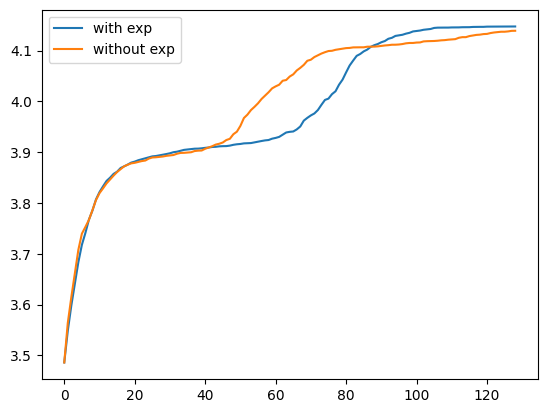

In [45]:
import matplotlib.pyplot as plt
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_44.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = "/home/hp/src/mollm_results/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507__43.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
key_name = 'avg_top100'
for i in range(len(file['results'])):
    top1a.append(file['results'][i][key_name])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][key_name])


plt.plot(top1a,label='with exp')
plt.plot(top1b,label='without exp')
plt.legend()
plt.show()

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
def fix_xy(x,y):
    new_x = []
    new_y = []

    for i in range(len(x) - 1):
        new_x.append(x[i])
        new_y.append(y[i])

        # 当前和下一个之间是否有断档（步长100）
        gap = x[i + 1] - x[i]
        if gap > 100:
            # 补上中间的点，间隔100
            for inter_x in range(x[i] + 100, x[i + 1], 100):
                new_x.append(inter_x)
                new_y.append(y[i])  # 用当前值补上

    # 加上最后一个点
    new_x.append(x[-1])
    new_y.append(y[-1])
    return new_x,new_y
def read_files_as_array(root,keyname,file_num=3,molopt=False):
    arrays = []
    xs = []
    seed = 42
    for i in range(file_num):
        filename = root.format(seed+i)
        with open(os.path.join(root,filename),'r') as f:
            file = json.load(f)
        array = []
        x = []
        if molopt:
            for j in range(len(file)):
                array.append(file[j][keyname])
                x.append(file[j]['n_oracles'])
            x,array = fix_xy(x,array)
        else:
            for j in range(len(file['results'])):
                array.append(file['results'][j][keyname])
                x.append(file['results'][j]['all_unique_moles'])
        arrays.append(array)
        xs.append(x)
    return xs,arrays

def plot_mean_std(root,keyname,label,file_num = 3,color='blue',molopt=False):
    # step 1: 裁剪为最短长度（也可以插值到相同长度）
    xs,arrays = read_files_as_array(root,keyname,file_num=file_num,molopt=molopt)
    min_len = min([len(arr) for arr in arrays])
    arrays = [arr[:min_len] for arr in arrays]
    xs = np.array([arr[:min_len] for arr in xs])
    xs = xs.mean(axis=0)

    # step 2: 叠在一起构成二维数组 (3, min_len)
    all_arrs = np.vstack(arrays)

    # step 3: 计算均值和标准差
    mean = np.mean(all_arrs, axis=0)
    std = np.std(all_arrs, axis=0)
    
    plt.plot(xs, mean, color=color, label=label, linewidth=2)
    plt.fill_between(xs, mean - std, mean + std, color=color, alpha=0.3,)

colors = [
    'tomato',        # 略带橘调的红色
    'royalblue',     # 稳重明亮的蓝色
    'seagreen',      # 温柔的绿色
    'darkorange',    # 强烈而有活力的橙色
    'mediumpurple',  # 淡雅的紫色
    'gold',          # 明亮金黄，像荧光笔
    'deepskyblue',   # 鲜艳清新的蓝色
    'hotpink',       # 活泼的粉色
    'slategray',     # 稳重的灰蓝色
    'olivedrab'      # 复古绿调
]


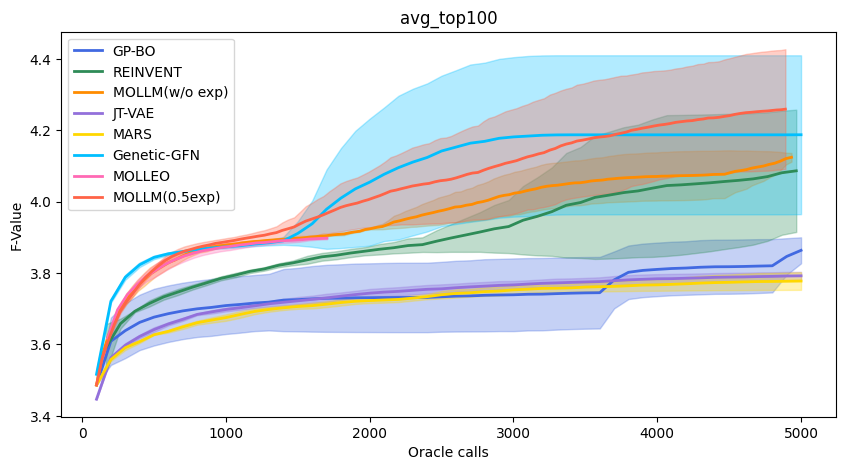

In [42]:
keyname = 'avg_top100'
plt.figure(figsize=(10, 5))

root = '/home/hp/src/mol_opt/main/gpbo/results/results_gp_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='GP-BO',color=colors[1],molopt=True)

root = '/home/hp/src/mol_opt/main/reinvent/results/results_reinvent_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='REINVENT',color=colors[2],molopt=True)

root = '/home/hp/src/mollm_results/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507__{}.json'
plot_mean_std(root,keyname,label='MOLLM(w/o exp)',color=colors[3])

root = '/home/hp/src/mol_opt/main/jt_vae/results/results_jt_vae_bo_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='JT-VAE',color=colors[4],molopt=True)

root = '/home/hp/src/mol_opt/main/mars/results/results_mars_qed:1+jnk3:1+drd2:1+gsk3b:1+sa:1_{}_random1_.json'
plot_mean_std(root,keyname,label='MARS',color=colors[5],molopt=True)

root = '/home/hp/src/genetic_gfn/multi_objective/genetic_gfn/results/results_{}.json'
plot_mean_std(root,keyname,label='Genetic-GFN',color=colors[6],molopt=True)

root = "/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{}random1.json"
plot_mean_std(root,keyname,file_num=3,label='MOLLEO',color=colors[7],molopt=True)

root = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.json'
plot_mean_std(root,keyname,file_num=5,label='MOLLM(0.5exp)',color=colors[0])

import matplotlib.pyplot as plt
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.3_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file = json.load(f)
filename = "/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/results/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_with_mols_42.json"
with open(os.path.join(root,filename),'r') as f:
    file2 = json.load(f)
top1a = []
top1b = []
for i in range(len(file['results'])):
    top1a.append(file['results'][i][keyname])
for i in range(len(file2['results'])):
    top1b.append(file2['results'][i][keyname])


#plt.plot(top1a,label='with exp with mols 0.3 ')
#plt.plot(top1b,label='with exp with mols 0.5 ')


plt.title(f'{keyname}')
plt.xlabel('Oracle calls')
plt.ylabel('F-Value')
plt.legend()
#plt.grid(True)
plt.show()


In [ ]:
names = ['drd2','qed','jnk3','gsk3b'
        'celecoxib_rediscovery', 'troglitazone_rediscovery','thiothixene_rediscovery',
         'albuterol_similarity','mestranol_similarity',
        'isomers_c7h8n2o2','isomers_c9h10n2o2pf2cl','median1','median2', 'osimertinib_mpo',
        'fexofenadine_mpo','ranolazine_mpo','perindopril_mpo', 'amlodipine_mpo',
        'sitagliptin_mpo','zaleplon_mpo','valsartan_smarts', 'deco_hop', 'scaffold_hop']
for name in names:
    a = {"property":name,"requirement":"increase"}
    print(f'\"{name}_requ\":{a},')

"celecoxib_rediscovery_requ":{'property': 'celecoxib_rediscovery', 'requirement': 'increase'},
"troglitazone_rediscovery_requ":{'property': 'troglitazone_rediscovery', 'requirement': 'increase'},
"thiothixene_rediscovery_requ":{'property': 'thiothixene_rediscovery', 'requirement': 'increase'},
"albuterol_similarity_requ":{'property': 'albuterol_similarity', 'requirement': 'increase'},
"mestranol_similarity_requ":{'property': 'mestranol_similarity', 'requirement': 'increase'},
"isomers_c7h8n2o2_requ":{'property': 'isomers_c7h8n2o2', 'requirement': 'increase'},
"isomers_c9h10n2o2pf2cl_requ":{'property': 'isomers_c9h10n2o2pf2cl', 'requirement': 'increase'},
"median1_requ":{'property': 'median1', 'requirement': 'increase'},
"median2_requ":{'property': 'median2', 'requirement': 'increase'},
"osimertinib_mpo_requ":{'property': 'osimertinib_mpo', 'requirement': 'increase'},
"fexofenadine_mpo_requ":{'property': 'fexofenadine_mpo', 'requirement': 'increase'},
"ranolazine_mpo_requ":{'property': 

In [57]:
from tdc import Oracle

for name in ['qed','sa','drd2','jnk3','gsk3b']:
    oracle = Oracle(name=name)
    print(f'{name} ,score:',oracle('N#Cc1ncn(-c2ccc(F)cc2F)n1'))

Found local copy...


qed ,score: 0.708458563549478


Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
Found local copy...
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when usi

sa ,score: 2.4566023495731475
drd2 ,score: 0.00092762715103974
jnk3 ,score: 0.0


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


gsk3b ,score: 0.01


/home/hp/miniconda3/envs/ai/lib/python3.11/site-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [55]:
import os
import json
root = '/home/hp/src/mollm_results/pmo/zhongzhuan,gpt-4o-2024-05-13/results'
files = os.listdir(root)
for filename in files:
    with open(os.path.join(root,filename),'r') as f:
        file = json.load(f)
    print(filename,file['results'][-1]['top10_auc'])

celecoxib_rediscovery_0507_exp0.5_random1_42.json 0.8250968631167201
median1_0507_exp0.5_random1_42.json 0.33894221470852237
gsk3b_0507_exp0.5_random1_42.json 0.995
isomers_c9h10n2o2pf2cl_0507_exp0.5_random1_42.json 0.8929083485209274
zaleplon_mpo_0507_exp0.5_random1_42.json 0.5360218411275506
jnk3_0507_exp0.5_random1_42.json 0.8220799999999999
amlodipine_mpo_0507_exp0.5_random1_42.json 0.6360975603489826
perindopril_mpo_0507_exp0.5_random1_42.json 0.6456676785721628
osimertinib_mpo_0507_exp0.5_random1_42.json 0.8879460554864432
thiothixene_rediscovery_0507_exp0.5_random1_42.json 0.7216724268689119
isomers_c7h8n2o2_0507_exp0.5_random1_42.json 0.9784271285003387
ranolazine_mpo_0507_exp0.5_random1_42.json 0.8432987063569599
deco_hop_0507_exp0.5_random1_42.json 0.8547050091114236
qed_0507_exp0.5_random1_42.json 0.9427570875153446
median2_0507_exp0.5_random1_42.json 0.27815292731431773
valsartan_smarts_0507_exp0.5_random1_42.json 0.0
fexofenadine_mpo_0507_exp0.5_random1_42.json 0.840946797

In [ ]:
def read_scores(path):
    init_scores = []
    scores = []
    for i in range(5):
        path = path.format(42+i)
        with open(path,'rb') as f:
            file = pickle.load(f)
        
        for i in file['final_pops']:
            scores.append(i.scores)
    print(file['properties'])
    for i in file['init_pops']:
        init_scores.append(i.scores)
    return np.array(scores),np.array(init_scores)
path = '/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{}.pkl'
final_scores,init_scores = read_scores(path)
np.mean(final_scores,axis=0),np.mean(init_scores,axis=0)

['sa', 'drd2', 'qed', 'gsk3b', 'jnk3']


(array([0.20666825, 0.00176709, 0.14866295, 0.1454    , 0.5224    ]),
 array([0.30214517, 0.00866239, 0.26957302, 0.0263    , 0.985     ]))

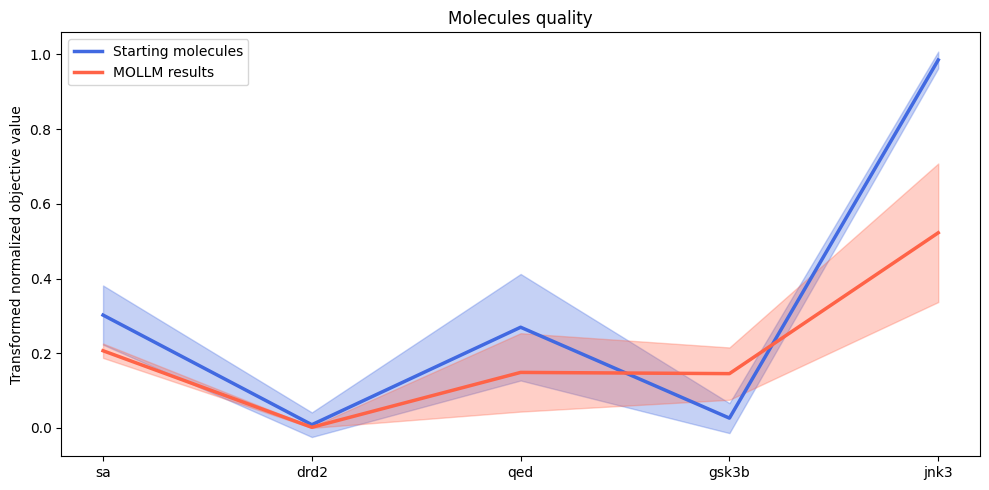

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
scores = init_scores
def plot_pareto(scores,color,label):
    x = np.arange(5)
    mean_values = np.mean(scores,axis=0)
    std_values = np.std(scores,axis=0)
    upper = mean_values + std_values
    lower = mean_values - std_values
    
    plt.fill_between(x, lower, upper, color=color, alpha=0.3)
    plt.plot(x, mean_values, color=color, linewidth=2.5, label=label)
plt.figure(figsize=(10, 5))
plot_pareto(init_scores,color=colors[1],label='Starting molecules')
plot_pareto(final_scores,color=colors[0],label='MOLLM results')
x = np.arange(5)
# 设置标签
plt.xticks(x, ['sa', 'drd2', 'qed', 'gsk3b', 'jnk3'])
plt.title("Molecules quality")
plt.ylabel("Transformed normalized objective value")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
'''
smis = []
scores = []
for i in file['init_pops']:
    smis.append(i.value)
    scores.append(i.total)
init_csv = pd.DataFrame({'smiles':smis,'scores':scores}).sort_values(by='scores',ascending=False).reset_index(drop=True)
init_csv.to_csv('/home/hp/src/admet/random1_init.csv',index=False)
'''

In [18]:
import pickle 
import pandas as pd
def save_mols(seed):
    root = f'/home/hp/src/mollm_results/exp/zhongzhuan,gpt-4o-2024-05-13/mols/sa_drd2_qed_gsk3b_jnk3_0507_exp0.5_{seed}.pkl'
    save_name = f'/home/hp/src/admet/gpt_4o_{seed}.csv'
    with open(root,'rb') as f:
        file = pickle.load(f)
    file.keys()
    smis = []
    scores = []
    for i in file['final_pops']:
        smis.append(i.value)
        scores.append(i.total)
    final_csv = pd.DataFrame({'smiles':smis,'scores':scores}).sort_values(by='scores',ascending=False).reset_index(drop=True)
    final_csv.to_csv(save_name,index=False)
file_num = 5
for i in range(file_num):
    save_mols(42+i)

In [30]:
import yaml
def save_mols_molopt():
    for j in range(2):
        seed = 42+j
        output_file_path = f"/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{seed}random1.yaml"
        save_name = f'/home/hp/src/admet/molleo_{seed}.csv'
        with open(output_file_path, 'r') as f:
            mol_buffer = yaml.unsafe_load(f)
        mol_buffer
        smis = []
        scores = []
        i = 0
        for key,value in mol_buffer.items():
            smis.append(key)
            scores.append(value[0])
            i+= 1
            if i==100:
                break
        final_csv = pd.DataFrame({'smiles':smis,'scores':scores}).sort_values(by='scores',ascending=False).reset_index(drop=True)
        final_csv.to_csv(save_name,index=False)
save_mols_molopt()

In [25]:
import os
seed = 1
output_file_path = f"/home/hp/src/MOLLEO_fork/multi_objective/main/molleo_multi_pareto/results/results_GPT-4_['jnk3', 'qed']_['sa', 'gsk3b', 'drd2']{seed}.yaml"
with open(output_file_path, 'r') as f:
    mol_buffer = yaml.unsafe_load(f)
len(mol_buffer)

3668